In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import pandas as pd
insurance_data  = pd.read_csv('Training_set_label.csv',encoding = "ISO-8859-1" )


In [ ]:
insurance_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0


In [ ]:
dataset = pd.get_dummies(insurance_data)

In [ ]:
dataset.head()

,Duration,Net Sales,Commision (in value),Age,Claim,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,...,Destination_URUGUAY,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,"Destination_VIRGIN ISLANDS, U.S.",Destination_ZAMBIA,Destination_ZIMBABWE,Gender_F,Gender_M
0,61,19.8,11.88,29,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,93,63.0,0.00,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,22.0,0.00,25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14,54.5,13.63,24,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,90,10.0,0.00,23,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
claims = dataset['Claim']
dataset_new = dataset.drop('Claim',
  axis='columns', inplace=True)

In [ ]:
#claims.head()
dataset.head()

,Duration,Net Sales,Commision (in value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,...,Destination_URUGUAY,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,"Destination_VIRGIN ISLANDS, U.S.",Destination_ZAMBIA,Destination_ZIMBABWE,Gender_F,Gender_M
0,61,19.8,11.88,29,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,93,63.0,0.00,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,22.0,0.00,25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14,54.5,13.63,24,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,90,10.0,0.00,23,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
claims = claims.to_numpy()

In [ ]:
print(claims)


[0 0 0 ... 0 0 0]


In [ ]:
dataset = dataset.to_numpy()

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(dataset, claims, train_size=0.8,random_state=1234)
# generate a no skill prediction (majority class)
default_probs = [0 for _ in range(len(y_test))]

#RANDOM FOREST

In [ ]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=20)

In [ ]:
rf_pred = rf.predict(X_test)

In [ ]:
accuracy_score(y_test, rf_pred)

0.9813510153336096

In [ ]:
#Probabilities of the predictions
rf_probs = rf.predict_proba(X_test)

In [ ]:
#We will use probabilities for the positive class only
rf_probs = rf_probs[:, 1]

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [ ]:
default_auc = roc_auc_score(y_test, default_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

In [ ]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (default_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.625


In [ ]:
# calculate roc curves
default_fpr, default_tpr, _ = roc_curve(y_test, default_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

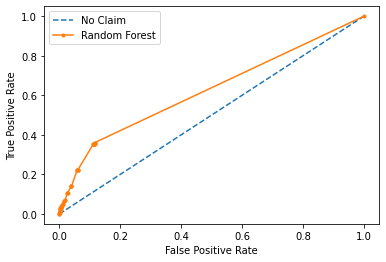

In [ ]:
# plot the roc curve for the model
pyplot.plot(default_fpr, default_tpr, linestyle='--', label='No Claim')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
print(insurance_data.shape)

(48260, 11)


#LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#LOGISTIC REGRESSION
lr = LogisticRegression(solver='liblinear', random_state=0)

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
lr_pred = lr.predict(X_test)

In [ ]:
accuracy_score(y_test, lr_pred)

0.983630335681724

In [ ]:
#Probabilities of the predictions
lr_probs = lr.predict_proba(X_test)

In [ ]:
#We will use probabilities for the positive class only
lr_probs = lr_probs[:, 1]

In [ ]:
lr_auc = roc_auc_score(y_test, lr_probs)

In [ ]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (default_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic Regression: ROC AUC=0.817


In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

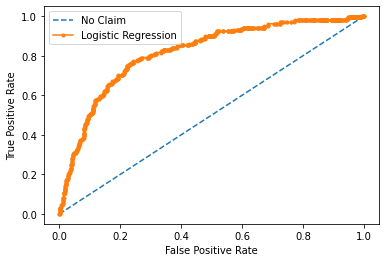

In [ ]:
# plot the roc curve for the Logistic Regression
pyplot.plot(default_fpr, default_tpr, linestyle='--', label='No Claim')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#DECISION TREE


In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Decision Trees
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
accuracy_score(y_test, dt_pred)

0.967260671363448

In [ ]:
#Probabilities of the predictions
dt_probs = dt.predict_proba(X_test)
#We will use probabilities for the positive class only
dt_probs = dt_probs[:, 1]
dt_auc = roc_auc_score(y_test, dt_probs)

In [ ]:
# summarize scores
print('No Claim: ROC AUC=%.3f' % (default_auc))
print('Decision Trees: ROC AUC=%.3f' % (dt_auc))

No Claim: ROC AUC=0.500
Decision Trees: ROC AUC=0.535


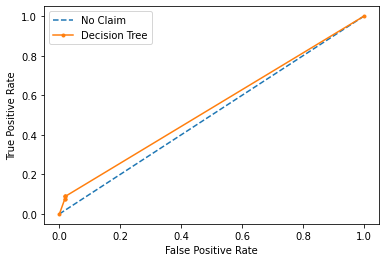

In [ ]:
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

# plot the roc curve for the Decision Tree Classifier
pyplot.plot(default_fpr, default_tpr, linestyle='--', label='No Claim')
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#GRADIENT BOOST

In [ ]:
# GRADIENT BOOST
gb = GradientBoostingClassifier(n_estimators=5, learning_rate = 0.2)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
accuracy_score(y_test, gb_pred)

0.9833195192706174

In [ ]:
#Probabilities of the predictions
gb_probs = gb.predict_proba(X_test)
#We will use probabilities for the positive class only
gb_probs = gb_probs[:, 1]
gb_auc = roc_auc_score(y_test, gb_probs)

In [ ]:
# summarize scores
print('No Claim: ROC AUC=%.3f' % (default_auc))
print('Gradient Boost: ROC AUC=%.3f' % (gb_auc))

No Claim: ROC AUC=0.500
Gradient Boost: ROC AUC=0.801


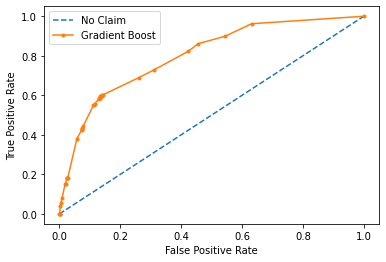

In [ ]:
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)

# plot the roc curve for the Decision Tree Classifier
pyplot.plot(default_fpr, default_tpr, linestyle='--', label='No Claim')
pyplot.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boost')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()